## 1. Классификация предметов одежды (датасет Fashion MNIST)



### 1.1 Решить задачу классификации, не используя сверточные слои. 
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

#### Архитектура модели
Эта архитектура нейронной сети включает в себя четыре слоя: 

1. Слой Flatten преобразует входное изображение в одномерный тензор. 

2. Первый линейный слой (nn.Linear) имеет 784 входных нейрона (28x28 изображение, представленное в виде одномерного тензора) и 256 выходных нейронов. 

3. Второй линейный слой имеет 256 входных нейронов и 128 выходных нейронов. 

4. Третий линейный слой имеет 128 входных нейронов и 64 выходных нейрона. 

5. Четвертый и последний линейный слой имеет 64 входных нейрона и 10 выходных нейронов, каждый из которых представляет классы (0-9), которые мы пытаемся классифицировать. 

Каждый линейный слой обрабатывается с использованием функции активации ReLU, которая помогает нейронам обнаруживать нелинейные зависимости между входными и выходными данными. 

В итоге, эта архитектура модели позволяет принимать на вход изображения размером 28х28 и предсказывать их класс (один из 10 возможных классов), используя 3 скрытых слоя и функцию активации ReLU.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


In [ ]:
# Задаем гиперпараметры
batch_size = 64
learning_rate = 0.01
num_epochs = 10

# Загружаем датасет MNIST и применяем преобразования
train_dataset = datasets.MNIST(root='./data/fmnist', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data/fmnist', train=False, transform=transforms.ToTensor())

# Создаем загрузчики данных
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
train_loader

In [ ]:
examples = next(iter(train_loader))
import matplotlib.pyplot as plt


In [ ]:
# plt.imshow((next(iter(train_loader))[0][0]).reshape(28,28))

(1,
 tensor([6, 5, 0, 6, 1, 2, 8, 8, 0, 8, 8, 9, 3, 1, 2, 7, 0, 2, 9, 7, 6, 3, 2, 0,
         3, 3, 9, 1, 8, 0, 7, 9, 5, 3, 9, 7, 2, 3, 7, 9, 9, 4, 6, 1, 2, 4, 1, 3,
         1, 8, 8, 9, 6, 6, 9, 5, 1, 3, 0, 8, 5, 4, 0, 5]))

In [ ]:
# Создаем модель
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(784, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 10)
            )

    def forward(self, x):
        x = self.layers(x)
        return x

In [ ]:
# Инициализируем модель и оптимизатор
model = Model()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Обучение модели
loss_graph = []

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = nn.functional.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print('Epoch {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1, num_epochs, batch_idx*len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            loss_graph.append(loss.item())


Epoch 1/10 [0/60000 (0%)]	Loss: 0.402602
Epoch 1/10 [6400/60000 (11%)]	Loss: 0.111644
Epoch 1/10 [12800/60000 (21%)]	Loss: 0.247502
Epoch 1/10 [19200/60000 (32%)]	Loss: 0.318033
Epoch 1/10 [25600/60000 (43%)]	Loss: 0.189672
Epoch 1/10 [32000/60000 (53%)]	Loss: 0.174199
Epoch 1/10 [38400/60000 (64%)]	Loss: 0.214521
Epoch 1/10 [44800/60000 (75%)]	Loss: 0.220866
Epoch 1/10 [51200/60000 (85%)]	Loss: 0.212227
Epoch 1/10 [57600/60000 (96%)]	Loss: 0.131796
Epoch 2/10 [0/60000 (0%)]	Loss: 0.134428
Epoch 2/10 [6400/60000 (11%)]	Loss: 0.204867
Epoch 2/10 [12800/60000 (21%)]	Loss: 0.049631
Epoch 2/10 [19200/60000 (32%)]	Loss: 0.148438
Epoch 2/10 [25600/60000 (43%)]	Loss: 0.112023
Epoch 2/10 [32000/60000 (53%)]	Loss: 0.121003
Epoch 2/10 [38400/60000 (64%)]	Loss: 0.255154
Epoch 2/10 [44800/60000 (75%)]	Loss: 0.140920
Epoch 2/10 [51200/60000 (85%)]	Loss: 0.141253
Epoch 2/10 [57600/60000 (96%)]	Loss: 0.119310
Epoch 3/10 [0/60000 (0%)]	Loss: 0.117174
Epoch 3/10 [6400/60000 (11%)]	Loss: 0.148027
Epoch 

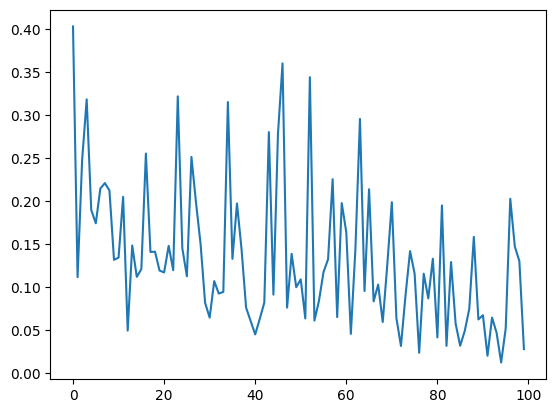

In [ ]:
plt.plot(loss_graph)

In [ ]:
# Оценка модели на тестовом множестве
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print('Accuracy on test set: {:.2f}%'.format(accuracy))

# Сохранение модели
torch.save(model.state_dict(), 'model.pth')

Accuracy on test set: 94.43%


(<matplotlib.image.AxesImage at 0x7f1146556ce0>, tensor(7))

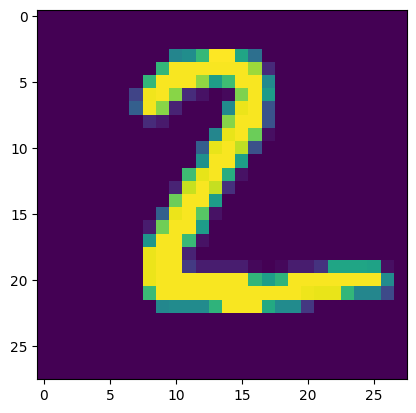

In [ ]:
# for data, target in test_loader:
#   print(target)
example = next(iter(test_loader))
image = (example[0][1]).reshape(28,28)
targ = example[1][0]
plt.imshow(image), targ

In [ ]:
model(example[0][1]).argmax()

tensor(2)

tensor(7)
tensor(2)
tensor(1)
tensor(0)
tensor(4)
tensor(1)
tensor(4)
tensor(9)
tensor(6)
tensor(9)


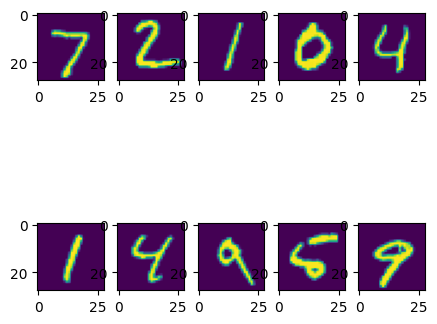

Доля правильных ответов: 100.0 %


In [ ]:
import random as rd
h = 0
correct = 1
fig, ax = plt.subplots(nrows=2, ncols=5,figsize = (5,5))
for i in ax:
  for j in i:
      j.imshow(example[0][h].reshape(28,28))
      pred = model(example[0][h]).argmax() 
      print(pred)
      if example[1][h] == pred:
        correct += 1
      h += 1
     
       

plt.show()
print(f"Доля правильных ответов: {correct * 100 / 10} %")

### 1.2 Решить задачу 1.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 90%
* Визуализировать результаты работы первого сверточного слоя

Сверточный слой (Convolutional layer) - это основной блок сверточной нейронной сети, который применяет свертку к входным данным. Свертка - это математическая операция, которая позволяет извлекать признаки из изображений, звуковых файлов и других типов данных. 

В сверточном слое используется набор фильтров, которые скользят (свертываются) по входным данным и вычисляют операцию свертки. Каждый фильтр обнаруживает определенные признаки во входных данных, такие как границы, текстуры, формы и т.д. В результате свертки получается карта признаков, которая затем подается на следующий слой.

Сверточные слои позволяют нейронной сети автоматически извлекать признаки из входных данных без необходимости задавать их явно. Они также помогают сократить количество параметров в сети, что упрощает ее обучение и ускоряет процесс распознавания. Сверточные сети широко используются для обработки изображений, видео, аудио и других типов данных, где важна локальная структура.


`self.conv1` является первым сверточным слоем и принимает на вход изображения с 1 каналом (черно-белые изображения), поэтому мы устанавливаем `in_channels=1`. Слой имеет 16 фильтров (out_channels=16), что означает, что он будет выдавать 16 карт признаков.

`kernel_size=3` означает, что размер ядра свертки будет 3x3, что позволяет рассматривать каждый пиксель в контексте соседних пикселей. `stride=1` означает, что ядро свертки будет перемещаться на 1 пиксель за раз, чтобы вычислить свертку со всеми пикселями в изображении. `padding=1` означает, что мы дополняем изображение нулями на границах, чтобы избежать уменьшения размера изображения после свертки.

`self.conv2` является вторым сверточным слоем и принимает на вход карты признаков, которые были выданы предыдущим сверточным слоем. В этом случае, `in_channels=16`, потому что первый сверточный слой выдал 16 карт признаков, а `out_channels=32`, что означает, что этот слой будет выдавать 32 карты признаков.

`self.pool` является слоем пуллинга, который выполняет операцию максимального пулинга на картах признаков, чтобы уменьшить размерность изображения. `kernel_size=2` означает, что мы используем окно размером 2x2 для выполнения операции максимального пулинга.

`self.fc1` является полносвязным слоем, который принимает на вход плоский вектор, полученный из карточек признаков, и выдает итоговый результат в виде 10 чисел, соответствующих классам в датасете fashionmnist. Размерность входа для этого слоя равна `32 * 7 * 7`, потому что после применения двух сверточных слоев и слоя пуллинга, размер карт признаков составляет 32x7x7.

Слой пулинга (pooling layer) в сверточных нейронных сетях является одним из основных компонентов, который используется для уменьшения размерности карт признаков, извлеченных из изображений. Он используется после сверточных слоев для сокращения количества параметров модели, уменьшения вычислительной сложности и предотвращения переобучения.

Слой пулинга работает путем разбиения карты признаков на несколько непересекающихся прямоугольных регионов (обычно 2x2 или 3x3), и затем заменяет все значения в каждом регионе на одно значение, которое является максимальным или средним значением в этом регионе. Максимальное пулингирование (max pooling) и среднее пулингирование (average pooling) являются двумя наиболее распространенными типами пулинга.

В результате применения слоя пулинга, размер карт признаков уменьшается в два раза (если используется пулинг размера 2x2), что позволяет уменьшить количество параметров модели и ускорить вычисления. Одновременно это может помочь в избежании переобучения модели, поскольку слой пулинга удаляет избыточную информацию из карт признаков и фокусируется только на наиболее важных признаках.

В сверточных нейронных сетях, слои пулинга обычно применяются после каждого сверточного слоя или нескольких сверточных слоев подряд, для того чтобы уменьшить размерность карт признаков. Они также позволяют сети получать инвариантность к небольшим трансляциям объектов в изображении, что повышает устойчивость к шуму и повышает точность классификации.

Кроме того, слои пулинга не имеют параметров, которые нужно обучать, поэтому они не увеличивают количество параметров в модели и не увеличивают вычислительную сложность.

Stride (шаг) определяет, на сколько пикселей (или элементов в других типах данных) будет сдвигаться фильтр при свертке. Если Stride больше единицы, то фильтр будет перескакивать через несколько пикселей, что уменьшает размер выходных данных. Уменьшение размера может быть полезно, например, для ускорения обучения или для сокращения количества параметров в сети.

Padding (заполнение) - это добавление нулей вокруг границ входных данных перед применением свертки. Заполнение позволяет сохранить размер выходных данных после свертки и уменьшить искажение краевых пикселей. Без заполнения свертка может привести к сокращению размера выходных данных и искажению признаков в углах изображения.

#### Архитектура сети

1. Conv2d layer с 1 входным каналом, 16 выходными каналами, ядром размером 3x3, шагом 1 и заполнением 1.
2. BatchNorm2d layer для нормализации выхода первого Conv2d слоя.
3. Conv2d layer с 16 входными каналами, 32 выходными каналами, ядром размером 3x3, шагом 1 и заполнением 1.
4. BatchNorm2d layer для нормализации выхода второго Conv2d слоя.
5. MaxPool2d слой с ядром размером 2x2 для уменьшения размерности изображения вдвое.
6. Conv2d layer с 32 входными каналами, 64 выходными каналами, ядром размером 3x3, шагом 1 и заполнением 1.
7. BatchNorm2d layer для нормализации выхода третьего Conv2d слоя.
8. MaxPool2d слой с ядром размером 2x2 для уменьшения размерности изображения вдвое.
9. Полносвязный слой (Linear) с 32*7*7 входными нейронами и 10 выходными нейронами.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
# Загрузка и предобработка данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                           download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)


100%|██████████| 26421880/26421880 [00:02<00:00, 11921187.44it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202692.22it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3725776.13it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8514304.81it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# Определение сверточной нейронной сети
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(F.relu(x))
        x = self.conv2(x)
        x = self.pool(F.relu(x))
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        return x


In [ ]:
net = Net()

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [ ]:
# Обучение модели
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

In [ ]:
# Проверка точности модели на тестовом множестве
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy}')

Accuracy on the test set: 87.88


In [ ]:
labels = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
labels[example[1][1]]

'Pullover'

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker


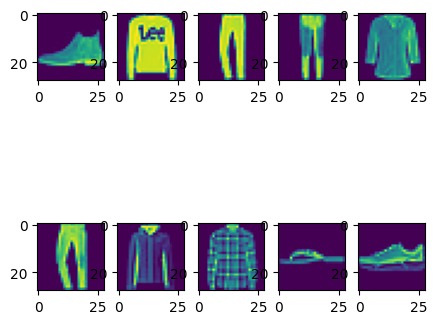

Доля правильных ответов: 100.0 %


In [ ]:
example = next(iter(testloader))
h = 0
correct = 0
fig, ax = plt.subplots(nrows=2, ncols=5,figsize = (5,5))
for i in ax:
  for j in i:
      j.imshow(example[0][h].reshape(28,28))
      pred = net(example[0][h]).argmax() 
      print(labels[pred])
      if example[1][h] == pred:
        correct += 1
      h += 1
     
       

plt.show()
print(f"Доля правильных ответов: {correct * 100 / 10} %")

##  2. Классификация изображений (датасет CIFAR 10) 


### 2.1 Решить задачу классификации, не используя сверточные слои. 

* Нормализовать данные (если необходимо)
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=None)

100%|██████████| 170498071/170498071 [00:03<00:00, 43024625.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
# Задаем гиперпараметры
batch_size = 64
learning_rate = 0.01
num_epochs = 10

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
examples = next(iter(train_loader))
import matplotlib.pyplot as plt


In [ ]:
images = next(iter(train_loader))[0][0]
images.reshape(3,32,32).T

tensor([[[0.5882, 0.6627, 0.8510],
         [0.5961, 0.6627, 0.8392],
         [0.6275, 0.6745, 0.8314],
         ...,
         [0.1922, 0.2196, 0.2314],
         [0.2706, 0.2980, 0.3059],
         [0.3020, 0.3176, 0.3176]],

        [[0.5765, 0.6471, 0.8353],
         [0.5882, 0.6510, 0.8275],
         [0.6235, 0.6706, 0.8235],
         ...,
         [0.2039, 0.2235, 0.2431],
         [0.2706, 0.2902, 0.3059],
         [0.3333, 0.3412, 0.3333]],

        [[0.5725, 0.6431, 0.8314],
         [0.5804, 0.6471, 0.8235],
         [0.6196, 0.6667, 0.8196],
         ...,
         [0.2157, 0.2510, 0.2667],
         [0.2588, 0.2902, 0.3020],
         [0.3294, 0.3451, 0.3294]],

        ...,

        [[0.8471, 0.7765, 0.8353],
         [0.8196, 0.7608, 0.8157],
         [0.7608, 0.7333, 0.8235],
         ...,
         [0.5098, 0.5059, 0.4941],
         [0.7451, 0.7255, 0.7176],
         [0.8353, 0.8157, 0.8039]],

        [[0.8431, 0.7804, 0.8510],
         [0.8118, 0.7608, 0.8392],
         [0.

In [ ]:
examples[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
# Создаем модель
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(32*32*3, 512),
                nn.ReLU(),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.Linear(128, 10)
            )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x

In [ ]:
#кол-во параметров модели

model = Model()
print(sum(p.numel() for p in model.parameters()))

1738890


In [ ]:
# Инициализируем модель и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Обучение модели
losses = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            losses.append(running_loss / 100)
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.299
[1,   200] loss: 2.288
[1,   300] loss: 2.271
[2,   100] loss: 2.207
[2,   200] loss: 2.160
[2,   300] loss: 2.107
[3,   100] loss: 2.015
[3,   200] loss: 1.977
[3,   300] loss: 1.943
[4,   100] loss: 1.895
[4,   200] loss: 1.868
[4,   300] loss: 1.855
[5,   100] loss: 1.812
[5,   200] loss: 1.786
[5,   300] loss: 1.776
[6,   100] loss: 1.738
[6,   200] loss: 1.718
[6,   300] loss: 1.709
[7,   100] loss: 1.671
[7,   200] loss: 1.663
[7,   300] loss: 1.648
[8,   100] loss: 1.627
[8,   200] loss: 1.607
[8,   300] loss: 1.604
[9,   100] loss: 1.569
[9,   200] loss: 1.577
[9,   300] loss: 1.559
[10,   100] loss: 1.528
[10,   200] loss: 1.532
[10,   300] loss: 1.534
[11,   100] loss: 1.501
[11,   200] loss: 1.487
[11,   300] loss: 1.482
[12,   100] loss: 1.472
[12,   200] loss: 1.451
[12,   300] loss: 1.442
[13,   100] loss: 1.426
[13,   200] loss: 1.420
[13,   300] loss: 1.410
[14,   100] loss: 1.389
[14,   200] loss: 1.386
[14,   300] loss: 1.382
[15,   100] loss: 1

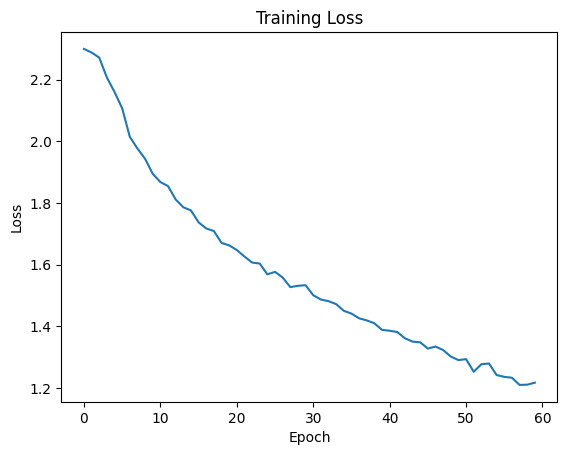

In [ ]:
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

automobile
automobile
automobile
automobile
automobile
automobile
automobile
automobile
automobile
automobile


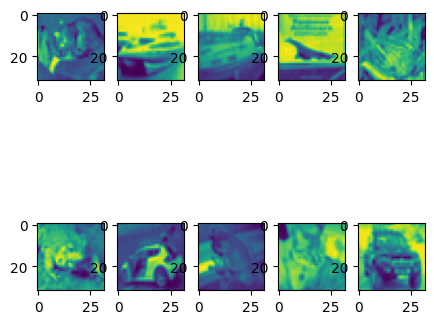

In [ ]:
#6
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
dataiter = iter(testloader)
images, labels = next(dataiter)
h = 0

g, ax = plt.subplots(nrows=2, ncols=5,figsize = (5,5))
for i in ax:
  for j in i:
    #ax.figure(figsize = (2,2))
    j.imshow(images[h].sum(axis = 0))
    #print(labels[h])
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    h +=1
    print(names[predicted[_.argmax()]])
    
plt.show()

In [ ]:
model(images[h].reshape(3072))

RuntimeError: ignored

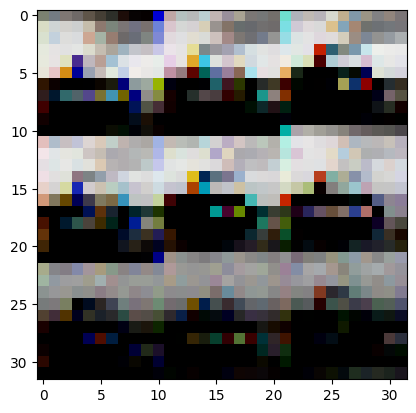

In [ ]:
plt.imshow(torchvision.utils.make_grid(next(dataiter)[0][0]).reshape(32,32,3))

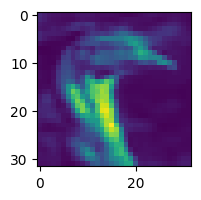

In [ ]:
plt.figure(figsize = (2,2))
image = next(dataiter)[0][0]
plt.imshow(image[0] + image[1] + image[2])

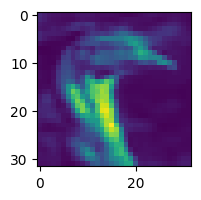

In [ ]:
plt.figure(figsize = (2,2))
plt.imshow(image.sum(axis=0))

In [ ]:
model(image.reshape(3072))

RuntimeError: ignored

In [ ]:
# 7. Матрица ошибок:

python
correct = 0
total = 0
all_labels = []
all_predicted = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.numpy())
        all_predicted.extend(predicted.numpy())

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

confusion = confusion_matrix(all_labels, all_predicted)
print(confusion)

In [ ]:
# 9. Сохранение модели:

python
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
# Оценка модели на тестовом множестве
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print('Accuracy on test set: {:.2f}%'.format(accuracy))

# Сохранение модели
torch.save(model.state_dict(), 'model.pth')

Accuracy on test set: 42.02%


### 2.2 Решить задачу 2.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 70%.
* Визуализировать результаты работы первого сверточного слоя

Мы умножаем на 8 два раза, потому что на этом этапе мы преобразуем выход сверточных слоев в вектор перед передачей его в полносвязный слой. Размер выхода сверточных слоев в нашей модели составляет 64x8x8, где 64 - это количество фильтров, 8 - это высота и ширина выхода сверточных слоев. 

Первое умножение на 8 происходит в строке `x = self.maxpool(x)`, где мы уменьшаем высоту и ширину выхода сверточных слоев в 2 раза с помощью операции max pooling. В результате, высота и ширина выхода становятся равными 8.

Второе умножение на 8 происходит в строке `x = x.view(-1, 64*8*8)`, где мы преобразуем выход сверточных слоев в вектор. Для этого мы умножаем количество фильтров (64) на высоту (8) и ширину (8) выхода сверточных слоев.

Таким образом, мы получаем одномерный вектор длиной 4096 (64*8*8), который передаётся в полносвязный слой размерности 512.

Высоту и ширину сверточного слоя определяют конфигурация сверточного слоя и размер входного изображения. 

Например, в модели из предыдущего ответа мы использовали два сверточных слоя с ядром размера 3x3 и с одинаковым заполнением (padding) равным 1. Это означает, что каждый пиксель входного изображения будет окружен пикселями из заполнения, чтобы размер выхода сверточного слоя был таким же, как и размер входа. 

Если входное изображение имеет размер 32x32 (32 пикселя по высоте и 32 пикселя по ширине), то после первого сверточного слоя размер выхода будет составлять 32x32 пикселя. Затем мы применяем операцию max pooling с ядром размера 2x2 и шагом (stride) 2, чтобы уменьшить размер выхода в 2 раза. Это дает нам выход размером 16x16 пикселей. После второго сверточного слоя размер выхода также составляет 16x16 пикселей.

Затем мы преобразуем выход сверточных слоев в вектор и передаем его в полносвязный слой. Для этого мы умножаем количество фильтров (64) на высоту (8) и ширину (8) выхода сверточных слоев, который в данном случае равен 16x16 (8 = 16/2/2).

Высота и ширина сверточного слоя определяются размером входного изображения, размером ядра свертки и параметрами padding и stride. 

Например, в случае сверточного слоя с ядром размером 3x3 и padding=1, для входного изображения размером 32x32 высота и ширина сверточного слоя будут равны 32. Если добавить stride=2, то высота и ширина сверточного слоя будут уменьшены в два раза и станут равными 16.

При последующих сверточных слоях высота и ширина могут изменяться в зависимости от размера ядра, padding, stride и количества фильтров в слое. Например, при увеличении количества фильтров высота и ширина могут уменьшаться, так как размерность выходного тензора увеличивается за счет большего количества фильтров.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


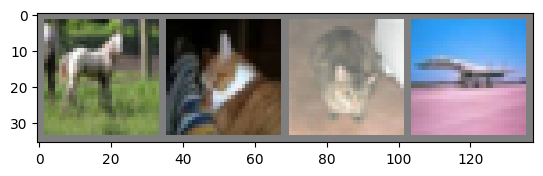

horse cat   cat   plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.224
[1,  4000] loss: 1.224
[1,  6000] loss: 1.220
[1,  8000] loss: 1.221
[1, 10000] loss: 1.232
[1, 12000] loss: 1.236
[2,  2000] loss: 1.229
[2,  4000] loss: 1.231
[2,  6000] loss: 1.236
[2,  8000] loss: 1.211
[2, 10000] loss: 1.236
[2, 12000] loss: 1.224
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

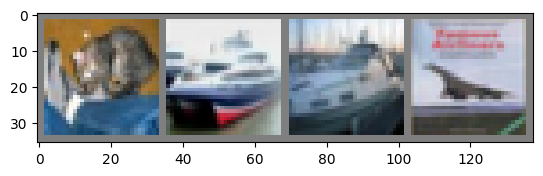

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   ship  ship 


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 52 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')  

Accuracy for class: plane is 34.3 %
Accuracy for class: car   is 57.4 %
Accuracy for class: bird  is 22.1 %
Accuracy for class: cat   is 47.6 %
Accuracy for class: deer  is 48.2 %
Accuracy for class: dog   is 32.8 %
Accuracy for class: frog  is 79.7 %
Accuracy for class: horse is 50.1 %
Accuracy for class: ship  is 80.8 %
Accuracy for class: truck is 71.9 %


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)

NameError: ignored

## 3. Загрузка изображений из внешних источников

### 3.1 Решить задачу классификации обезьян (датасет [monkey.zip](https://disk.yandex.ru/d/OxYgY4S7aR6ulQ)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 60%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import zipfile
# from tqdm import tqdm

# zf = zipfile.ZipFile('drive/MyDrive/datasets/monkeys.zip')
# for file in tqdm(zf.infolist()):
#     zf.extract(file)

In [ ]:
# 1. Загрузка архива с данными на диск:


!wget https://disk.yandex.ru/d/OxYgY4S7aR6ulQ
!unzip monkeys.zip


--2023-05-26 06:29:53--  https://disk.yandex.ru/d/OxYgY4S7aR6ulQ
Resolving disk.yandex.ru (disk.yandex.ru)... 87.250.250.50, 2a02:6b8::2:50
Connecting to disk.yandex.ru (disk.yandex.ru)|87.250.250.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29351 (29K) [text/html]
Saving to: ‘OxYgY4S7aR6ulQ.1’

OxYgY4S7aR6ulQ.1    100%[===================>]  28.66K  --.-KB/s    in 0.1s    

2023-05-26 06:29:55 (200 KB/s) - ‘OxYgY4S7aR6ulQ.1’ saved [29351/29351]

unzip:  cannot find or open monkeys.zip, monkeys.zip.zip or monkeys.zip.ZIP.


In [ ]:
# 2. Создание датасета на основе файлов при помощи torchvision.datasets.ImageFolder:


import torchvision.datasets as datasets

train_dataset = datasets.ImageFolder('monkey/training/training', transform=transforms.ToTensor())
test_dataset = datasets.ImageFolder('monkey/validation/validation', transform=transforms.ToTensor())



FileNotFoundError: ignored

In [ ]:
# 3. Преобразование изображений к тензорами одного размера:


transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder('monkey/training/training', transform=transform)
test_dataset = datasets.ImageFolder('monkey/validation/validation', transform=transform)


FileNotFoundError: ignored

In [ ]:
# 4. Предложение архитектуры модели для решения задачи и обучение модели:


import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(64 * 50 * 50, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = x.view(-1, 64 * 50 * 50)
        x = self.fc1(x)
        x = self.fc2(x)
        return x



In [ ]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataset)//32, loss.item()))

In [ ]:
# Тестирование модели на тестовом множестве
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy на тестовом множестве: {} %'.format(100 * correct / total))

### 3.2 Решить задачу классификации собак и кошек (датасет [cats_dogs.zip](https://disk.yandex.ru/d/wQtt5O1JF9ctnA)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 80%

In [ ]:
# 1. Загрузка архива с данными на диск:


!wget https://disk.yandex.ru/d/OxYgY4S7aR6ulQ
!unzip monkeys.zip


--2023-05-26 06:29:53--  https://disk.yandex.ru/d/OxYgY4S7aR6ulQ
Resolving disk.yandex.ru (disk.yandex.ru)... 87.250.250.50, 2a02:6b8::2:50
Connecting to disk.yandex.ru (disk.yandex.ru)|87.250.250.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29351 (29K) [text/html]
Saving to: ‘OxYgY4S7aR6ulQ.1’

OxYgY4S7aR6ulQ.1    100%[===================>]  28.66K  --.-KB/s    in 0.1s    

2023-05-26 06:29:55 (200 KB/s) - ‘OxYgY4S7aR6ulQ.1’ saved [29351/29351]

unzip:  cannot find or open monkeys.zip, monkeys.zip.zip or monkeys.zip.ZIP.


In [ ]:
# 2. Создание датасета на основе файлов при помощи torchvision.datasets.ImageFolder:


import torchvision.datasets as datasets

train_dataset = datasets.ImageFolder('monkey/training/training', transform=transforms.ToTensor())
test_dataset = datasets.ImageFolder('monkey/validation/validation', transform=transforms.ToTensor())



FileNotFoundError: ignored

In [ ]:
# 3. Преобразование изображений к тензорами одного размера:


transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder('monkey/training/training', transform=transform)
test_dataset = datasets.ImageFolder('monkey/validation/validation', transform=transform)


FileNotFoundError: ignored

In [ ]:
# 4. Предложение архитектуры модели для решения задачи и обучение модели:


import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(64 * 50 * 50, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = x.view(-1, 64 * 50 * 50)
        x = self.fc1(x)
        x = self.fc2(x)
        return x



In [ ]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataset)//32, loss.item()))

In [ ]:
# Тестирование модели на тестовом множестве
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy на тестовом множестве: {} %'.format(100 * correct / total))

# 4. Transfer Learning

### 4.1 Решить задачу 3.1, воспользовавшись предобученной моделью VGG16
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель (не замораживать веса). Вычислить значение accuracy на тестовом множестве
* Дообучить модель (заморозить все веса, кроме последнего блока слоев (`classifier`)). 
* Вычислить значение accuracy на тестовом множестве.


In [ ]:
# 1. Загрузка данных:


!wget https://www.dropbox.com/s/4j8n5yyl6oar6ns/monkey.zip
!unzip monkey.zip


In [ ]:
# 2. Преобразования:


import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('monkey/training/training', transform=transform)
test_dataset = datasets.ImageFolder('monkey/validation/validation', transform=transform)



In [ ]:
# 3. Замена последнего полносвязного слоя:


import torchvision.models as models

model = models.vgg16(pretrained=True)
num_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_features, 10)


In [ ]:
# 4. Дообучение модели без заморозки весов:


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataset)//32, loss.item()))

# Тестирование модели на тестовом множестве
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy на тестовом множестве: {} %'.format(100 * correct / total))


In [ ]:
# 5. Дообучение модели с заморозкой весов:


for param in model.features.parameters():
    param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataset)//32, loss.item()))



In [ ]:
# Тестирование модели на тестовом множестве
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy на тестовом множестве: {} %'.format(100 * correct / total))

### 4.2 Решить задачу 3.2, воспользовавшись подходящей предобученной моделью
* Не использовать VGG16 (вместо нее можно взять resnet18 или другую)
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель. 
* Вычислить значение accuracy на тестовом множестве (добиться значения не меньше 97-98%)

In [ ]:
# 1. Используем ResNet18:


model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)



In [ ]:
# 2. Загрузка данных:


!wget https://www.dropbox.com/s/2h8ywa4kq3e0eel/fruits.zip
!unzip fruits.zip

In [ ]:
# 3. Преобразования:


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('fruits-360/Training', transform=transform)
test_dataset = datasets.ImageFolder('fruits-360/Test', transform=transform)

In [ ]:
# 4. Замена последнего полносвязного слоя:


model.fc = nn.Linear(num_features, len(train_dataset.classes))

In [ ]:
# 5. Дообучение модели без заморозки весов:


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataset)//32, loss.item()))



In [ ]:
# Тестирование модели на тестовом множестве
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy на тестовом множестве: {} %'.format(100 * correct / total))

In [ ]:
# 6. Дообучение модели с заморозкой весов:


for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_dataset)//32, loss.item()))


In [ ]:

# Тестирование модели на тестовом множестве
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy на тестовом множестве: {} %'.format(100 * correct / total))